# Decision Trees
*Def:* A Decision support tool that uses a tree-like graph or model of decisions and their possible consequences, include chance event outcomes, resource costs and utility.


Tree based learning algorithms are considered to be one of the best and mostly used supervised learning methods.

![Decision Tree Example](./images/a_decision_tree.png)

### Common Terms used with Decision Trees

** *Root Node*: It represents entire population or sample and this further gets divided into two or more homogeneous sets.

** *Splitting*: It is a process of dividing a node into two or more sub-nodes.

** *Decision Node*: When a sub-node splits into further sub-nodes, then it is called decision node.

** *Leaf/ Terminal Node*: Nodes do not split is called Leaf or Terminal node.

** *Pruning*: When we remove sub-nodes of a decision node, this process is called pruning. You can say opposite process of splitting.

** *Branch / Sub-Tree*: A sub section of entire tree is called branch or sub-tree.

** *Parent and Child Node*: A node, which is divided into sub-nodes is called parent node of sub-nodes whereas sub-nodes are the child of parent node.

In [34]:
#import libraries
import pandas as pd
import numpy as np

from sklearn.datasets import load_breast_cancer
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt

In [26]:
#load dataset
X,y = load_breast_cancer(return_X_y=True)

#train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

#initialize the decisiontreeclassifier
dtc = tree.DecisionTreeClassifier(max_depth=5,random_state=42)

In [27]:
#fit and return f1_score
dtc.fit(X,y)

f1_score(y_test,dtc.predict(X_test))

1.0

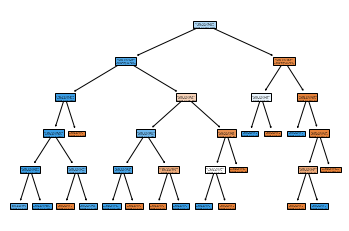

In [35]:
#show decision tree
tree.plot_tree(dtc,filled = True);
plt.savefig('./images/tree_example.png')